In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [6]:
bb=pd.read_csv('Company_Data.csv')

In [7]:
bb

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [8]:
bb.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
bb.shape

(400, 11)

In [11]:
bb.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

# Data Processing

In [12]:
bb['ShelveLoc'].unique(),bb['Urban'].unique(),bb['US'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [14]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [15]:
bb['ShelveLoc']=LE.fit_transform(bb['ShelveLoc'])
bb['Urban']=LE.fit_transform(bb['Urban'])
bb['US']=LE.fit_transform(bb['US'])

In [16]:
bb.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [17]:
bb

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# COVERTING SALES INTO CATEGORICAL VARIABLE

In [18]:
bb.insert(11,"sales_variable",'')
bb

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_variable
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [19]:
for i in range(0,len(cd_df['Sales'])):
    if bb['Sales'][i]>=10.0:
        bb['sales_variable'][i] = 'High'
    elif bb['Sales'][i]<=6.0:
        bb['sales_variable'][i] = 'Low'
    else:
        bb['sales_variable'][i] = 'Medium'

In [20]:
bb

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_variable
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


# Model building

In [22]:
X=bb.iloc[:,1:-1]
Y=bb.iloc[:,-1]

In [23]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [24]:
Y.head()

0    Medium
1      High
2      High
3    Medium
4       Low
Name: sales_variable, dtype: object

# split into training and testing data

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

In [26]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
303,133,52,16,290,99,2,43,11,1,1
349,134,27,18,467,96,2,49,14,0,1
149,121,120,13,140,87,2,56,11,1,1
100,113,69,11,94,106,2,76,12,0,1
175,115,89,0,38,122,2,25,12,1,0
...,...,...,...,...,...,...,...,...,...,...
369,135,100,22,463,122,2,36,14,1,1
320,136,70,12,171,152,2,44,18,1,1
15,149,95,5,400,144,2,76,18,0,0
125,89,78,0,181,49,2,43,15,0,0


In [27]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
332,106,33,20,354,104,2,61,12,1,1
111,132,118,12,272,151,2,43,14,1,1
352,133,103,14,288,122,1,61,17,1,1
205,113,22,1,317,132,2,28,12,1,0
56,133,82,0,54,84,2,50,17,1,0
...,...,...,...,...,...,...,...,...,...,...
304,123,98,12,408,134,1,29,10,1,1
187,117,32,0,142,96,0,62,17,1,0
166,119,67,17,151,137,2,55,11,1,1
64,100,67,12,184,104,2,32,16,0,1


In [28]:
y_train

303      High
349    Medium
149      High
100       Low
175    Medium
        ...  
369      High
320       Low
15     Medium
125    Medium
265       Low
Name: sales_variable, Length: 320, dtype: object

In [29]:
y_test

332       Low
111    Medium
352      High
205       Low
56       High
        ...  
304      High
187    Medium
166    Medium
64     Medium
27        Low
Name: sales_variable, Length: 80, dtype: object

# model training testing and evaluation

# Using GINI

In [30]:
model= DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [31]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Medium    39
Low       28
High      13
dtype: int64

In [32]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.6

In [33]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        High       0.69      0.50      0.58        18
         Low       0.61      0.63      0.62        27
      Medium       0.56      0.63      0.59        35

    accuracy                           0.60        80
   macro avg       0.62      0.59      0.60        80
weighted avg       0.61      0.60      0.60        80



In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,preds))

[[ 9  1  8]
 [ 1 17  9]
 [ 3 10 22]]


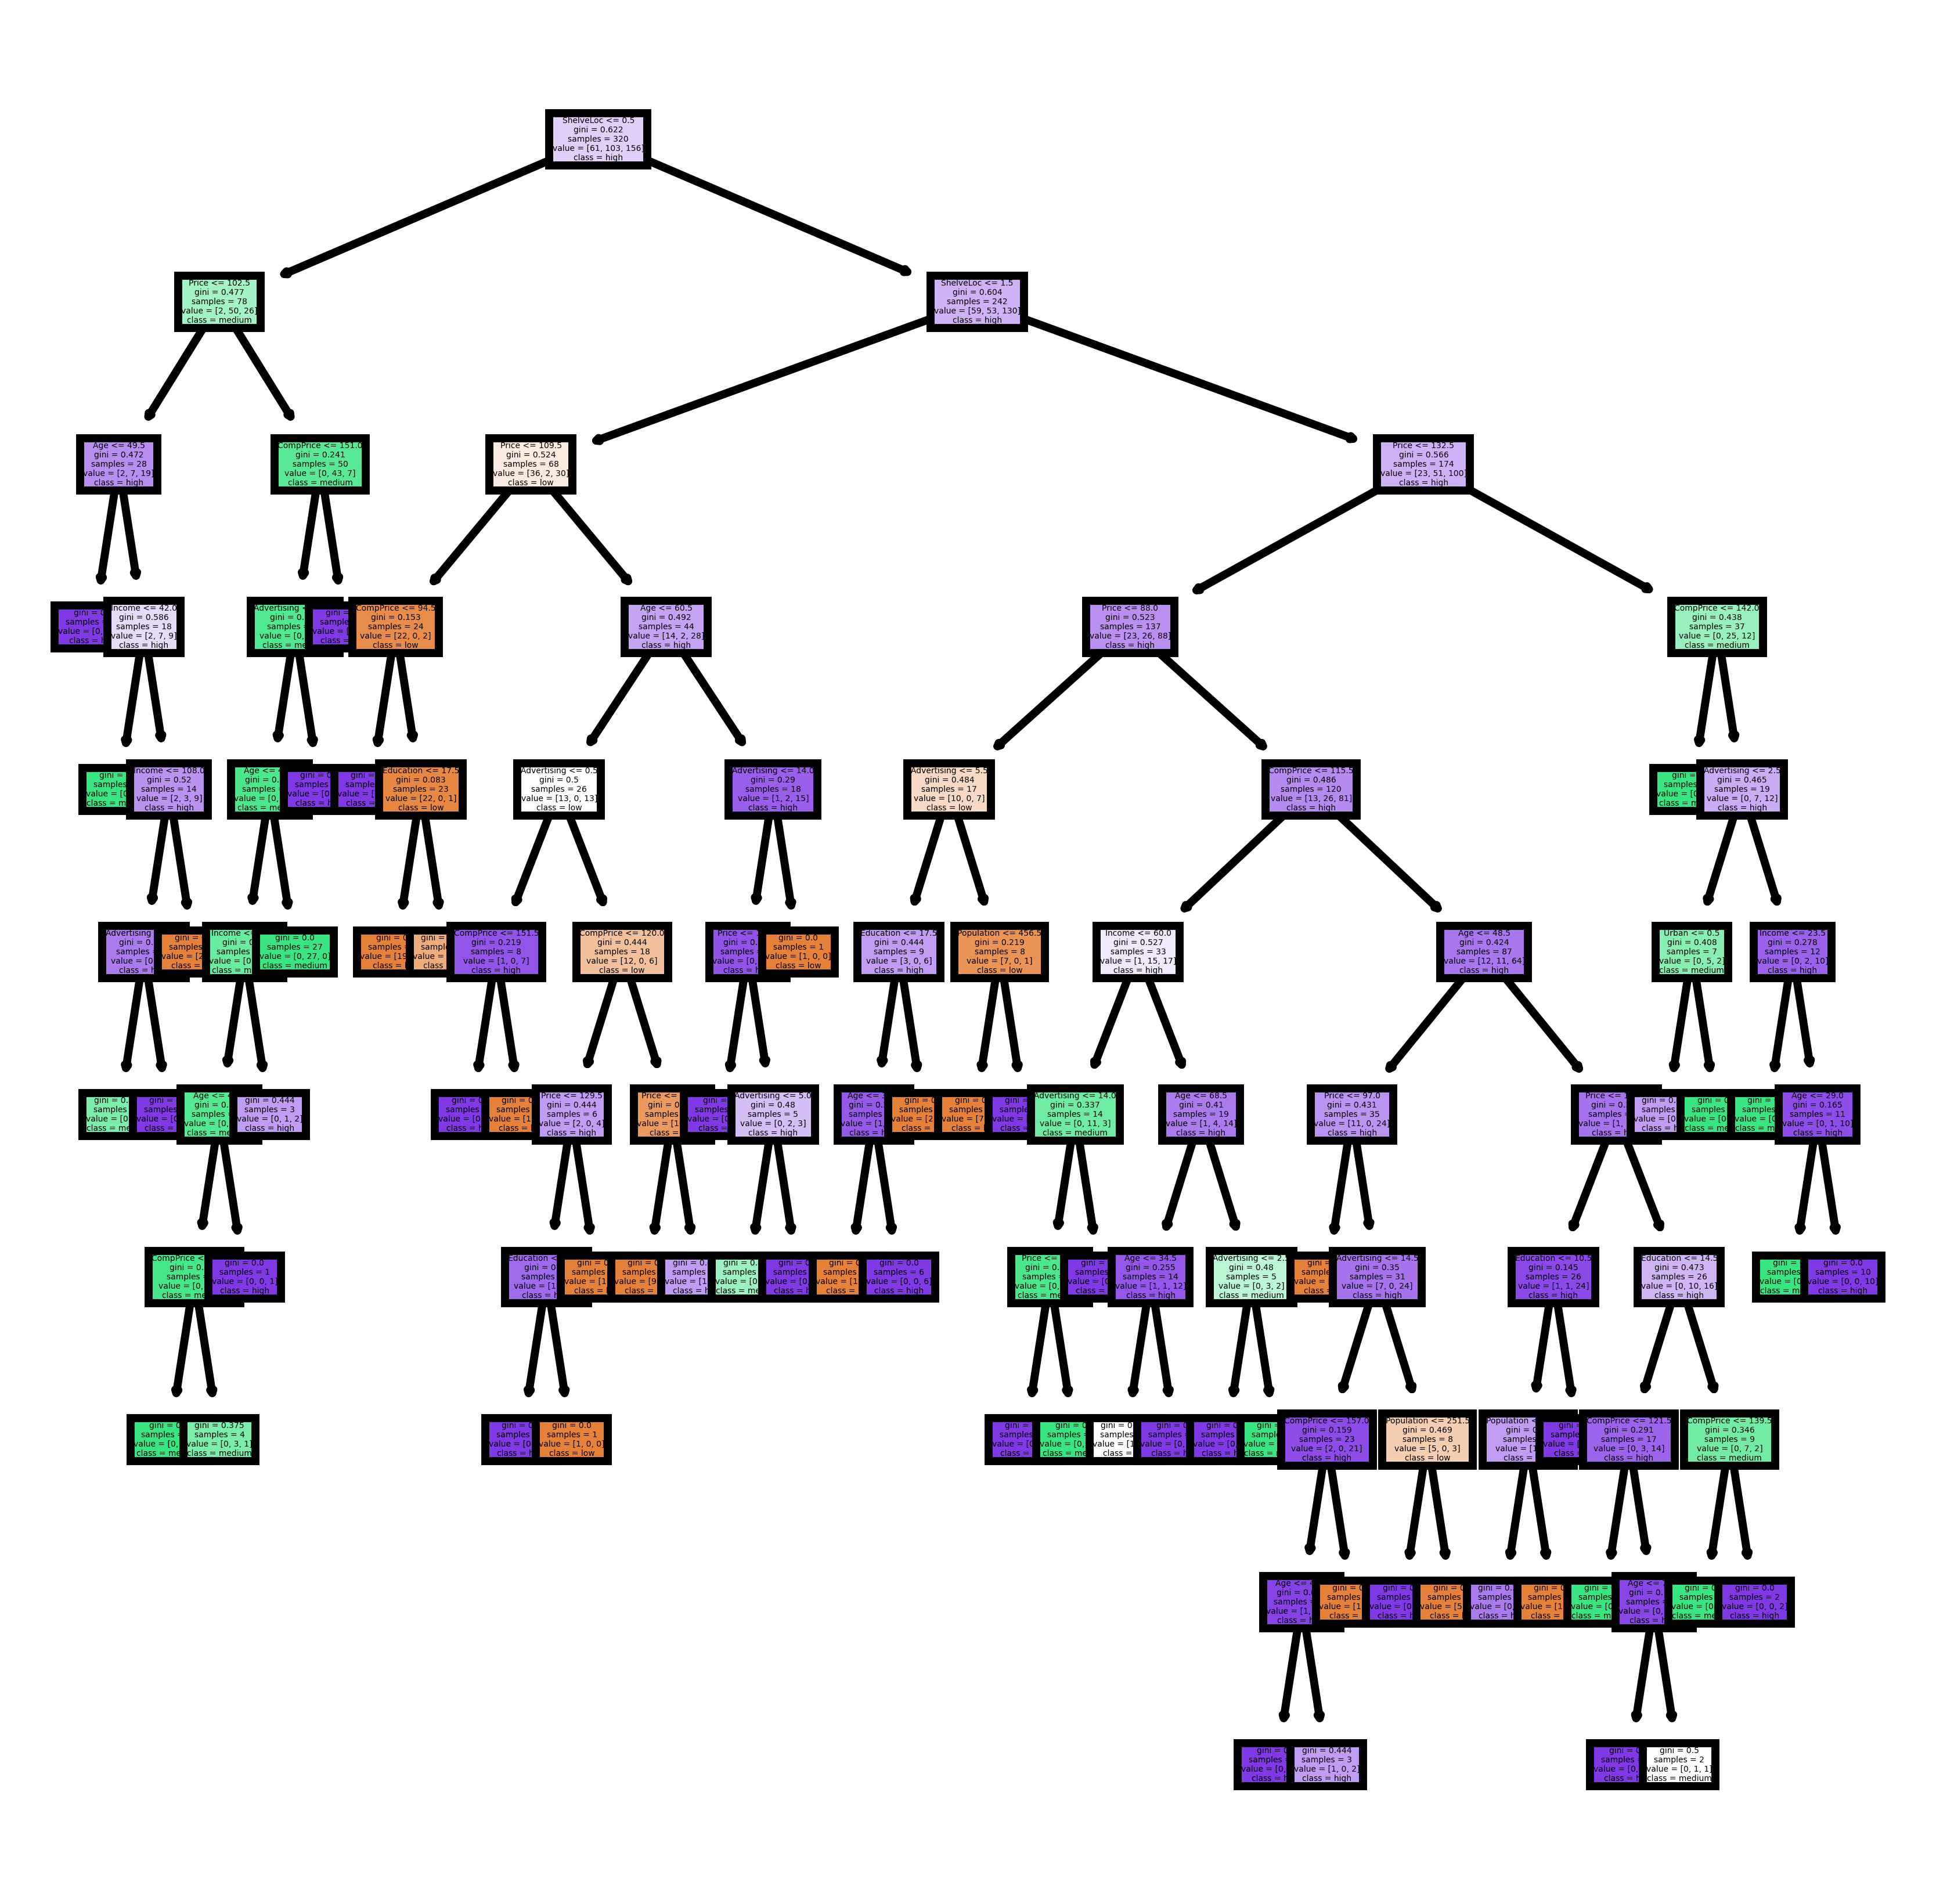

In [35]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['low','medium','high']
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
plt.show()

# Using enotropy

In [36]:
model2 = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [37]:
pred = model2.predict(x_test) 
pd.Series(pred).value_counts()

Medium    39
Low       27
High      14
dtype: int64

In [39]:
pred=model2.predict(x_test)
metrics.accuracy_score(pred,y_test)

0.6

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       0.57      0.44      0.50        18
         Low       0.70      0.70      0.70        27
      Medium       0.54      0.60      0.57        35

    accuracy                           0.60        80
   macro avg       0.60      0.58      0.59        80
weighted avg       0.60      0.60      0.60        80



# feature selection technique

In [41]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeClassifier())
rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [42]:
rfe.get_support()

array([ True, False,  True, False,  True,  True,  True, False, False,
       False])

In [43]:
rfe_data = x_train.columns[rfe.get_support()]
rfe_data

Index(['CompPrice', 'Advertising', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [44]:
x_train_transform_rfe = rfe.transform(x_train)
x_test_transform_rfe = rfe.transform(x_test)

In [45]:
rfe_model = DecisionTreeClassifier()
rfe_model.fit(x_train_transform_rfe,y_train)

DecisionTreeClassifier()

In [46]:
y_pred_rfe = rfe_model.predict(x_test_transform_rfe)

In [47]:
imp_feature_rfe=rfe_model.feature_importances_

In [48]:
rfe_data=pd.DataFrame({'feature':rfe_data,'imp_feature':imp_feature_rfe})
rfe_data=rfe_data.sort_values('imp_feature')

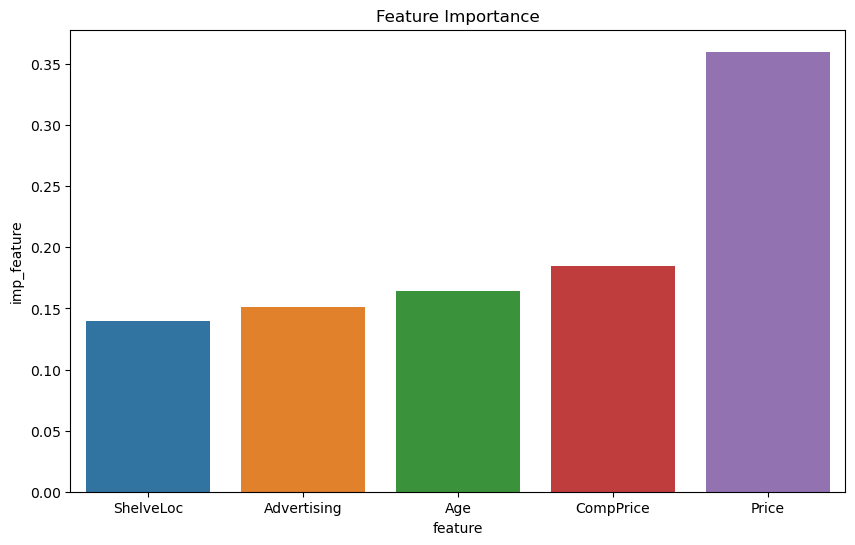

In [49]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='imp_feature', x='feature', data=rfe_data)
plt.show()